In [1]:
import os

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches

In [2]:
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.gist_earth(np.linspace(0.5,1,256))
cols = np.vstack((c_agua, c_terr))
terreno=cm.colors.LinearSegmentedColormap.from_list("terreno", cols)

In [17]:
# Malla base
grilla_base=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\config02\bat_l2_iv_region_v2.grd"
grd_base=xr.open_dataset(grilla_base)

# Malla a anidar
grilla_2=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\config02\bat_l3_serecoq_conf1.grd"
grd_2=xr.open_dataset(grilla_2)

# Carpeta de guardado
save_dir=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\config02"

# Nombre
save_name="bat_l3_serecoq_conf1_v2.grd"

# refinement ratio deseado
factor=4

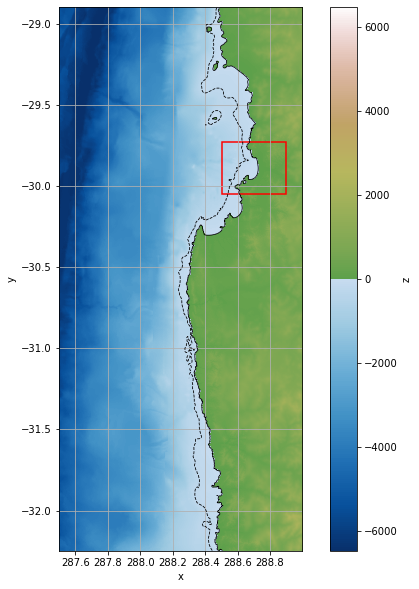

In [18]:
### Ploteo
fig,ax1=plt.subplots(figsize=(10,10))
grd_base.z.plot.imshow(cmap=terreno,ax=ax1)
grd_base.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.8,ax=ax1)

# Aqui se definen las caracteristicas principales del rectangulo
inf_izq=[grd_2.x.values[0],grd_2.y.values[-1]]
ancho=grd_2.x.values[-1]-grd_2.x.values[0]
alto=grd_2.y.values[0]-grd_2.y.values[-1]

rect=patches.Rectangle((inf_izq[0],inf_izq[1]),ancho,alto,linewidth=1.5
                       ,edgecolor='r',facecolor='none')
ax1.add_patch(rect)

ax1.set_aspect('equal')
plt.grid()
plt.show()

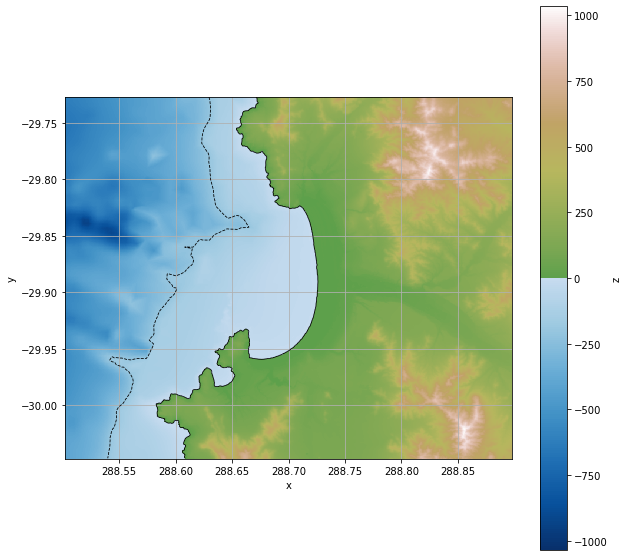

In [19]:
# Espaciamientos de la malla base y cantidad de puntos
dx_base=np.diff(grd_base.x)[0]
dy_base=np.diff(grd_base.y)[0]

x2_min,x2_max=grd_2.x.min(),grd_2.x.max()
y2_min,y2_max=grd_2.y.min(),grd_2.y.max()

# Elementos de la malla grande que caben en el dominio pequeño
grilla_recortada=grd_base.where((grd_base.x >= x2_min) & (grd_base.x <= x2_max)
               & (grd_base.y >= y2_min)&(grd_base.y <= y2_max),drop=1)

# nueva grilla en x e y
gx=np.arange(grilla_recortada.x.min()-dx_base/factor*0.5*(factor-1)
             ,grilla_recortada.x.max()+dx_base/factor*0.5*(factor-1)+dx_base/factor/2
             ,dx_base/factor)
gy=np.arange(grilla_recortada.y.min()-dy_base/factor*0.5*(factor-1)
             ,grilla_recortada.y.max()+dy_base/factor*0.5*(factor-1)+dy_base/factor/2
             ,dy_base/factor)

#gxi=grd_base.x.sel(x=grd_2.x[0],method='nearest')+dx_base/factor/2+dx_base/2
##gxf=grd_base.x.sel(x=grd_2.x[-1],method='nearest')-dx_base/factor/2-dx_base/2
#
#gyi=grd_base.y.sel(y=grd_2.y[0],method='nearest')+dy_base/factor/2+dy_base/2
##gyf=grd_base.y.sel(y=grd_2.y[-1],method='nearest')-dy_base/factor/2-dy_base/2
#
#gx=np.arange(gxi,grd_base.x.max(),dx_base/factor)
#gx=np.where(gx<)
#
#gy=np.arange(gyi,grd_base.y.max(),dy_base/factor)

# interpola los datos de la nueva grilla
grd_out=grd_2.interp(x=xr.DataArray(gx, dims="x")
                 , y=xr.DataArray(gy, dims="y"),method='nearest')

## Ploteo de grilla anidada
fig,ax1=plt.subplots(figsize=(10,10))
ploteo=grd_out.z.plot.imshow(cmap=terreno,ax=ax1)
grd_out.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.8,ax=ax1)

ax1.set_aspect('equal')
plt.grid()
plt.show()

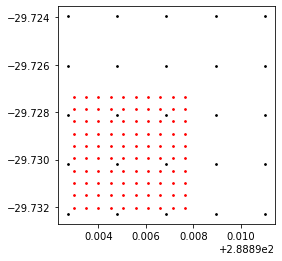

In [20]:
#verificacion de la malla
centro=[grd_out.x.max(),grd_out.y.max()]
b=0.01

xmax,xmin=centro[0]+b/2,centro[0]-b/2
ymax,ymin=centro[1]+b/2,centro[1]-b/2

#mascara
grilla_base=grd_base.where((grd_base.x >= xmin) & (grd_base.x <= xmax)
               & (grd_base.y >= ymin)&(grd_base.y <= ymax),drop=1)

grilla_out=grd_out.where((grd_out.x >= xmin) & (grd_out.x <= xmax)
               & (grd_out.y >= ymin)&(grd_out.y <= ymax),drop=1)

Xb,Yb=np.meshgrid(grilla_base.x,grilla_base.y)
X2,Y2=np.meshgrid(grilla_out.x,grilla_out.y)

fig,ax1=plt.subplots()
ax1.scatter(Xb,Yb,s=3, color ='k')
ax1.scatter(X2,Y2,s=3, color ='r')

ax1.set_aspect('equal')
plt.show()

In [21]:
#guarda
grd_out.to_netcdf(os.path.join(save_dir,save_name),format='NETCDF3_CLASSIC')
print(os.path.join(save_dir,save_name))

G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\config02\bat_l3_serecoq_conf1_v2.grd
